<a href="https://colab.research.google.com/github/ej970221/ORIE-4580/blob/main/HW6_KJ%2CER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ORIE 4580/5580 Assignment 6

#### Students: Eunyoung (Katie) Jung (ej97) and Emuna Rouhani (er443)

### Github link: [example Github link](https://github.com/SidBanerjee/ORIE4580-Simulation/blob/main/Notebooks/Unit0-Intro_Demos.ipynb)


### Instructions


* Due Tuesday, November 14, at 11.59am on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/56826#:~:text=Assignments-,Assignments,-Assignments%20Module%20publish). Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Bard or ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**. You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.



### Suggested reading

[Mor Harchol-Balter's chapter](https://canvas.cornell.edu/courses/56826/files/9180297/download?download_frd=1) on the Poisson process (on Canvas)

Reference: ChatGPT

Discussed Problem with : Shiyu Chen, Amy Chitnumsab, Office Hour TA

___
___

# Question 1: Everyone goes to Gimme! (25 points)

The downtown Ithaca Gimme! store sees a Poisson arrival process with rate

$$ \lambda(t)=\frac{1}{56}\left(5t^3-90t^2+300t+1480\right) \quad \text{for } 0 \leq t \leq 12,$$

over the 12 hours on the weekdays it is open.


___

**(a)** Compute the exact probability that the coffee store will see more than 250 customers in one 12 hour day. Do not use simulation.
___


## Ans.

The number of customers arrive in one 12 hour day in Downtown Ithaca Gimme! store is $X_0\sim Poisson(\lambda)$

We first need to calculate the $\lambda =E[t]$

Given that $$ \lambda(t)=\frac{1}{56}\left(5t^3-90t^2+300t+1480\right) \quad \text{for } 0 \leq t \leq 12,$$

$\lambda = \int_0^{12}\frac{1}{56}(5t^3-90t^2+300t+1480)$

$= (\frac{5}{224} t^4 - \frac{30}{56}t^3 + \frac{150}{56}t^2 + \frac{1480}{56} t)\  |_0^{12}$

$=240$

$P(X>250) = 1- P(X \le 250)$

$P(X\le250) = \sum_{i=0}^{250} \frac{e^{-\lambda}*\lambda^{i}}{i!}$

$= \sum_{i=0}^{250} \frac{e^{-240}*240^{i}}{i!} = e^{-240} \sum_{i=0}^{250} \frac{240^{i}}{i!}$

$= 0.753$

Therefore, $P(X>250) = 1 - 0.753 = 0.247 = 24.7\%$

In [1]:
# Just used to calculate the summation.

import math

y = 0
for i in range(251):
  x = (240**i)/math.factorial(i)
  y += x

ans = y * math.exp(-240)

print(ans)

0.7528874679404329


___

**(b)** Use thinning to simulate 500 replications of the Poisson arrival process. Based on these replications, estimate the probability in Part (a) and report a 95\% confidence interval.

___

## Ans.



In [3]:
import numpy as np

def rate(t):
    return (1/56) * (5*t**3 - 90*t**2 + 300*t + 1480)

t = np.linspace(0, 12, 1000)
max_rate = max(rate(t))

arrival_count = []

for i in range(500):
    total_arrival = np.random.poisson(max_rate * 12)
    arrival_time = np.random.uniform(0, 12, total_arrival)

    actual_arrival = [t for t in arrival_time if np.random.rand() < rate(t) / max_rate]
    arrival_count.append(len(actual_arrival))

#Probability arrival>250
p= sum(count > 250 for count in arrival_count) / 500

std= np.sqrt(p* (1 - p) / 500)
ci = (p - 1.96 * std, p + 1.96 * std)

print("Estimated Probability: ", p)
print("95% Confidence Interval: ", ci)

Estimated Probability:  0.268
95% Confidence Interval:  (0.22917656064694938, 0.3068234393530507)


___
**(c)** Based on your 500 replications, make a bar plot showing the average number of customers who arrive during each of the twelve hours of operation. Plot the rate function $\lambda(t)$ and compare.
___

## Ans.

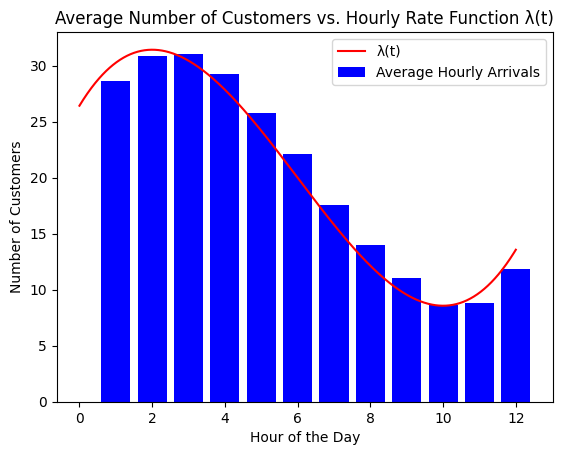

In [4]:
import matplotlib.pyplot as plt

def rate(t):
    return (1/56) * (5*t**3 - 90*t**2 + 300*t + 1480)

# Initialize an array to store hourly counts for each replication
hour_count = np.zeros((500, 12))

# Maximum rate for the thinning process
t = np.linspace(0, 12, 1000)
max_rate = max(rate(t))

# Simulate the process 500 times
for i in range(500):
    total_arrival = np.random.poisson(max_rate * 12)
    arrival_time = np.random.uniform(0, 12, total_arrival)
    for j in arrival_time:
        if np.random.rand() < rate(j) / max_rate:
            hour_count[i, int(j)] += 1

# Calculate the average number of arrivals per hour across all replications
average = np.mean(hour_count, axis=0)

# Plotting the bar plot for average hourly arrivals
plt.bar(range(1, 13), average, color='blue', label='Average Hourly Arrivals')

# Plotting the rate function λ(t) for comparison
plt.plot(t, rate(t), color='red', label='λ(t)')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Customers')
plt.title('Average Number of Customers vs. Hourly Rate Function λ(t)')
plt.legend()
plt.show()




---
---


# Question 2: Putting my son to bed (30 points)

Sid uses a Spotify playlist with $n$ soothing songs to put his son to sleep. He plays the playlist on shuffle, but is worried that some songs may not get played (he spent a long time curating the playlist!).

___
**(a)**
Suppose Spotify truly picks a random song each time -- Sid wants to know how many songs it takes on average to play **every song** on his playlist. Build a simulator to estimate this for a different values of $n$, and use this to try and guess the function.

*Note: Try and pick a large range of $n$ to get a sense of the function of number of songs needed to play all vs. $n$ -- if you are adventurous, try to fit the function. Make sure you always show your CIs!*
___

## Ans.


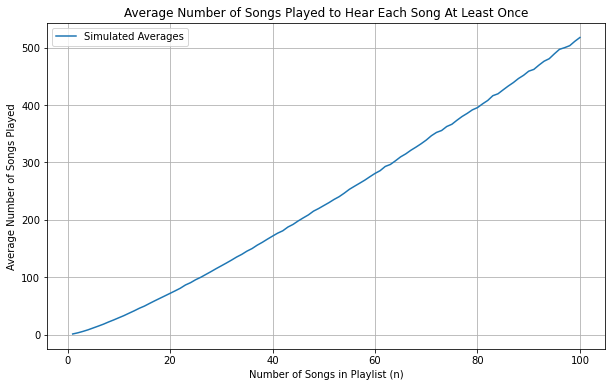

(146.07608905550268, -294.09152516647424)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def simulate_playlist(n, trials):
    total_plays = 0

    for _ in range(trials):
        played = set()
        while len(played) < n:
            played.add(np.random.randint(0, n))
            total_plays += 1

    return total_plays / trials

ns = range(1, 101)
trials = 10000
averages = [simulate_playlist(n, trials) for n in ns]

plt.figure(figsize=(10, 6))
plt.plot(ns, averages, label='Simulated Averages')
plt.xlabel('Number of Songs in Playlist (n)')
plt.ylabel('Average Number of Songs Played')
plt.title('Average Number of Songs Played to Hear Each Song At Least Once')
plt.legend()
plt.grid(True)
plt.show()

def function1(n, a, b):
    return a * np.log(n) + b

params, covariance = curve_fit(function1, ns, averages)
a, b = params
a, b


___

**(b)** On the other hand, Sid has realized that his son wakes up whenever he hears a song that has been played before (clever, isn't he!). Use your previous simulator to figure out how many songs Sid's son hears before he wakes up.

___

## Ans.



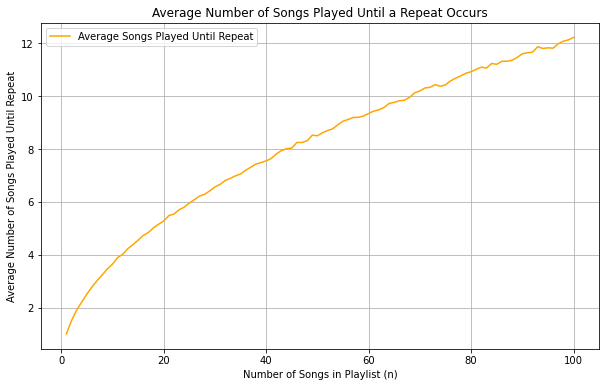

In [ ]:
def simulate_playlist_until_repeat(n, trials):
    total_plays = 0
    for _ in range(trials):
        played = set()
        while True:
            song = np.random.randint(0, n)
            if song in played:
                break
            played.add(song)
            total_plays += 1
    return total_plays / trials

averages_until_repeat = [simulate_playlist_until_repeat(n, trials) for n in ns]

plt.figure(figsize=(10, 6))
plt.plot(ns, averages_until_repeat, label='Average Songs Played Until Repeat', color='orange')
plt.xlabel('Number of Songs in Playlist (n)')
plt.ylabel('Average Number of Songs Played Until Repeat')
plt.title('Average Number of Songs Played Until a Repeat Occurs')
plt.legend()
plt.grid(True)
plt.show()


___

**(c)** Suppose Spotify uses the following poor randomizer: it labels songs as $\{0,1,2,\ldots,n-1\}$, and after playing a song $i$, it then either plays song $(i+1) mod(n)$ or $(i-1)mod(n)$ with probability $1/2$ (i.e., the next or previous song, imagining the songs to be in a ring with $n-1$ wrapping around to $1$). Simulate this randomizer for $n=20$, assuming you always start at song $1$, and find the histogram of the **last song to be played** for the first time using this shuffler.   

___

## Ans.

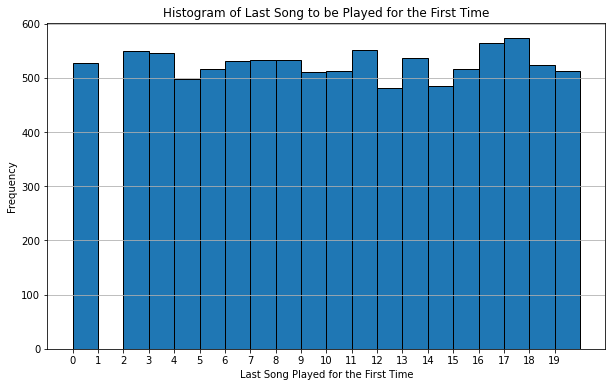

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def poor_randomizer_simulation(n, trials):
    last_song_first_time = []

    for _ in range(trials):
        played = set()
        current_song = 1

        while len(played) < n:
            played.add(current_song)
            if len(played) == n:
                last_song_first_time.append(current_song)
            current_song = (current_song + np.random.choice([-1, 1])) % n

    return last_song_first_time

n = 20
trials = 10000
last_songs = poor_randomizer_simulation(n, trials)

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(last_songs, bins=n, range=(0,n), edgecolor='black')
plt.xlabel('Last Song Played for the First Time')
plt.ylabel('Frequency')
plt.title('Histogram of Last Song to be Played for the First Time')
plt.xticks(range(n))
plt.grid(axis='y')
plt.show()


___

**(d) (OPTIONAL)** For the above three questions, try and analytically derive the functions that you should get (and compare)

### (a) Average Number of Songs Played to Hear Each Song At Least Once

This problem is similar to the Coupon Collector's Problem. The expected number of songs to be played to hear each song at least once in a playlist of \( n \) songs can be calculated using the harmonic sum. The formula is:

$$
E(n) = n \left( \frac{1}{1} + \frac{1}{2} + \frac{1}{3} + \cdots + \frac{1}{n} \right)
$$

As $ n $ becomes large, this sum approaches $ n \times \ln(n) $ so the expected number of songs played is approximately $( n \ln(n)$.

### (b) Average Number of Songs Played Until a Repeat Occurs

This problem is also like the "Birthday Problem". The formula for the expected number of trials (songs) until a repeat in a set of \( n \) items is:

$$
E(n) = \sqrt{2n \ln(1/(1-p))}
$$

For large $ n $, this simplifies to $\sqrt{2n \ln(n)}$, assuming $ p $ (probability of no repeat) is close to 1.

### (c) Last Song Played for the First Time with Poor Randomizer

The poor randomizer's behavior in choosing the next or previous song with equal probability introduces a Markov chain with a circular structure like we spoke about in lecture.

Each song has an equal chance of being the next song played at each step, except for the first and last songs in the sequence. A uniform distribution could be used for the distribution of songs played, but with slight deviations for songs at the edges of the sequence.

___
___

# Question 3: The gambler's ruin (20 points)

The gambler's ruin is one of the most famous and widely studied models in stochastic processes. Imagine two gamblers $A$ and $B$ are playing a tournament, where they each start with $a$ and $b$ initially, and play a sequence of games, where each game is won by either player with probability $1/2$, with the winner giving $1$ to the loser. Play goes on till one player runs out of money.

___

**(a)** Simulate this model to find the probability that player $A$ wins the overall tournament. Also, try and derive this analytically, and see how well the two match up.

___

## Ans.

In [ ]:
# Define the function to simulate the gambler's ruin problem
def gambler_ruin_simulation(a, b, trials):
    a_wins = 0  # Counter for A's wins
    for _ in range(trials):
        cash_a, cash_b = a, b  # Set the initial amount of cash for A and B
        # Simulate the games until one player runs out of money
        while cash_a > 0 and cash_b > 0:
            if np.random.rand() < 0.5:
                cash_a += 1
                cash_b -= 1
            else:
                cash_a -= 1
                cash_b += 1
        if cash_a > 0:  # If A still has money, A wins
            a_wins += 1
    return a_wins / trials  # Return the probability of A winning

# Set initial conditions
initial_cash_a = 50
initial_cash_b = 50
number_of_trials = 1000

# Run the simulation
probability_a_wins_simulation = gambler_ruin_simulation(initial_cash_a, initial_cash_b, number_of_trials)
probability_a_wins_simulation


0.509

___
**(b)** Another question we can ask is how long it takes for the tournament to end. To study this, simulate the gambler's ruin for a range of values of $a$ and $b$, and use this to try and guess the expected time to ruin.

*Hint: Convince yourself that the function must be symmetric in $a$ and $b$, so you can assume $a\leq b$. Try plotting the expected absorption times for selected values of $a$, while varying $b$.*

___

## Ans.

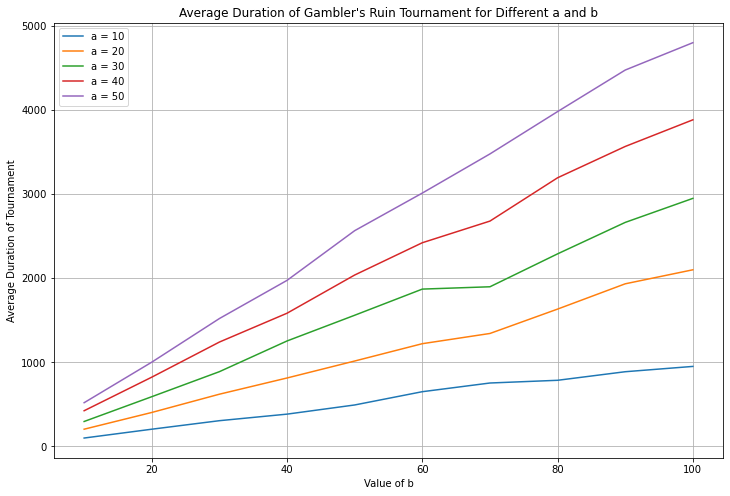

In [ ]:
def simulate_gamblers_ruin_duration(a, b, trials):
    """
    Simulates the gambler's ruin problem for 'trials' number of times and calculates the average duration
    of the tournament.
    """
    total_duration = 0

    for _ in range(trials):
        money_a, money_b = a, b
        duration = 0

        while money_a > 0 and money_b > 0:
            duration += 1
            if np.random.rand() < 0.5:
                money_a -= 1
                money_b += 1
            else:
                money_a += 1
                money_b -= 1

        total_duration += duration

    return total_duration / trials

# Set of values for 'a' (assuming a <= b)
a_values = [10, 20, 30, 40, 50]
# Range of values for 'b'
b_range = range(10, 101, 10)
trials = 1000

# Store average durations for different 'a' and 'b' values
average_durations = {a: [simulate_gamblers_ruin_duration(a, b, trials) for b in b_range] for a in a_values}

# Plotting the results
plt.figure(figsize=(12, 8))
for a in a_values:
    plt.plot(b_range, average_durations[a], label=f'a = {a}')

plt.xlabel('Value of b')
plt.ylabel('Average Duration of Tournament')
plt.title('Average Duration of Gambler\'s Ruin Tournament for Different a and b')
plt.legend()
plt.grid(True)
plt.show()


___
___

# Question 4: Simulation assigments take forever (25 points)

You are convinced that Simulation homeworks take the longest time compared to all other assignments, while Sid maintains that all assignment times are identically distributed. To decide this debate once and for all, you decide to record how long it takes you to do your assignment, and then survey your friends on how long it took them to do their last assignment until you find someone who took longer$\ldots$

___

**(a)**
Suppose Sid is right (!) and all assignment completion times are truly identically distributed. Formally suppose your own assignment takes time (in hours) distributed as $T_0\sim Exp(0.5)$, and similarly the $i^{th}$ friend you survey also takes time $T_i\sim Exp(0.5)$, independent of all other friends. Run 100 simulations and report a $95\%$ CI for the expected number of friends you need to survey to find someone who takes longer.
___


## Ans.


In [12]:
import numpy as np
import scipy.stats as stats

def survey(n,r):
    num_friends_needed = []
    for i in range(n):
        my_time = np.random.exponential(1/r)
        friend_time = 0
        friend_count = 0
        while friend_time <= my_time:
            friend_time = np.random.exponential(1/r)
            friend_count += 1

        num_friends_needed.append(friend_count)
    return num_friends_needed

result = survey(100,0.5)

mean = np.mean(result)
std = np.std(result) / np.sqrt(100)
ci = (mean - 1.96 * std, mean + 1.96 * std)

print("Average number of friends needed:", mean)
print("95% confidence interval:", (ci))


Average number of friends needed: 6.66
95% confidence interval: (0.8571274638848054, 12.462872536115196)


___

**(b)** You are concerned that the CI looks a little wide, so decide to do more replications to fix the problem. Repeat the above simulation with number of replications $n\in\{100,500,1000,1500,2000,2500,\ldots,9500,10000\}$, and plot the estimates and $95\%$ CIs.
___

## Ans.


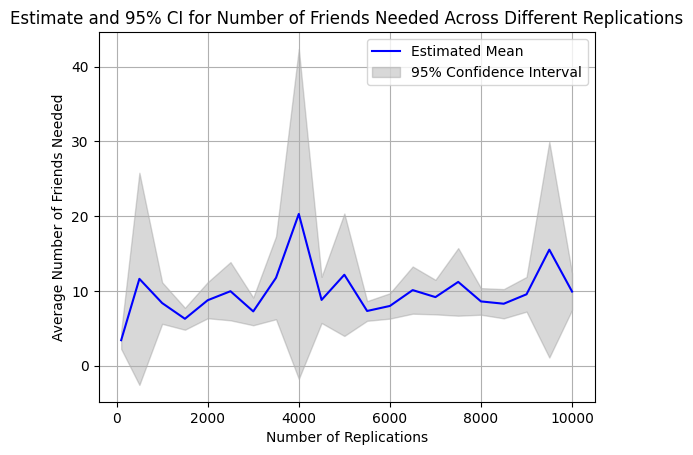

In [13]:
import matplotlib.pyplot as plt
replication = [100, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 8000, 8500, 9000, 9500, 10000]

# Store the means and confidence intervals
meanvals = []
ci_lower = []
ci_upper = []

# Run simulations for each number of replications
for n in replication:
    result = survey(n, 0.5)
    mean = np.mean(result)
    std = np.std(result) / np.sqrt(n)
    ci = (mean - 1.96 * std, mean + 1.96 * std)

    meanvals.append(mean)
    ci_lower.append(ci[0])
    ci_upper.append(ci[1])


plt.plot(replication, meanvals, label='Estimated Mean', color='blue')
plt.fill_between(replication, ci_lower, ci_upper, color='gray', alpha=0.3, label='95% Confidence Interval')

plt.xlabel('Number of Replications')
plt.ylabel('Average Number of Friends Needed')
plt.title('Estimate and 95% CI for Number of Friends Needed Across Different Replications')
plt.legend()
plt.grid(True)
plt.show()

___
**(c)** Hopefully you found the previous part a little surprising(?) Why is that the case? Well, this question highlights an important aspect of simulation that we have taken for granted in past problems -- in order to get an estimator for an unknown quantity, we *need that quantity to be finite*! Find an expression for computing the expected number of queries till we get one which is larger in the above setting, and argue that it is infinite.

*Hint: Remember how we used linearity of expectation and indicator random variables before? Try doing the same, with indicator variables for the $i^{th}$ person (for each $i\in\{1,2,\ldots\}$) being the first person surveyed who took longer than you).*
___


The Indicator variable $I_i$ is
\begin{align*}
I_i = \begin{cases}
1 &\mbox{ if ith person being the first person surveyed who took longer} \\
0 & \mbox{ otherewise}.
\end{cases}
\end{align*}

Therefore, In order to make $I_i = 1$ ith person should take longer than you and there shouldn't be anyone who took longer than you up until (i-1)th person.

Let p = probability that ith person take longer than you. Then, probability of $I_i = 1 $ is $(1-p)^{i-1} * p$

Since $I_i$ is an indiactor variable, $E[I_i]$ is equal to the probability

Therefore, $E[I_i] = (1-p)^{i-1}*p$

Therefore, $E[Query] =\sum_{i=1}^{\infty}i* E[I_i]$

$= p + (1-p)^2p\ * 2 + (1-p)^3*p * 3+....$

Therefore, $E[Query]$ goes to infinity.